In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('../../data/processed/cleaned_music_population.csv')

In [5]:
df_onehot = pd.get_dummies(df, drop_first=True)
df_onehot.shape, df.shape

((45020, 31), (45020, 13))

In [6]:
#Eliminating outliers
df_onehot = df_onehot[df_onehot['popularity'] > 0]

In [7]:
X = df_onehot.drop(columns=['popularity'])
y = df_onehot['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [8]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

In [9]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [ ]:
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_absolute_percentage_error','r'])

In [11]:
ann.fit(X_train_scaled, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
569/569 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1197.5417 - mean_absolute_error: 28.9144 - mean_absolute_percentage_error: 66.0629 - val_loss: 98.5655 - val_mean_absolute_error: 7.7310 - val_mean_absolute_percentage_error: 26.6040
Epoch 2/100
569/569 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 93.1649 - mean_absolute_error: 7.5232 - mean_absolute_percentage_error: 25.2428 - val_loss: 86.8454 - val_mean_absolute_error: 7.2288 - val_mean_absolute_percentage_error: 25.5095
Epoch 3/100
569/569 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 84.6421 - mean_absolute_error: 7.1472 - mean_absolute_percentage_error: 23.5025 - val_loss: 82.9699 - val_mean_absolute_error: 7.0744 - val_mean_absolute_percentage_error: 25.3749
Epoch 4/100
569/569 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 81.3344 - mean_absolute_error: 7.0135 - mean_absolute_percentage_error: 23.7689 - val_loss: 80.6623 - val_mean_absolute_error: 6.9682 - val_mean_absolute_percentage_error: 24.8124
Epoch 5/100
569/569 ━━━━━━━━━━━━━

In [12]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,185 (12.45 KB)

 Trainable params: 1,061 (4.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,124 (8.30 KB)

In [14]:
y_pred = ann.predict(X_test_scaled)

278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


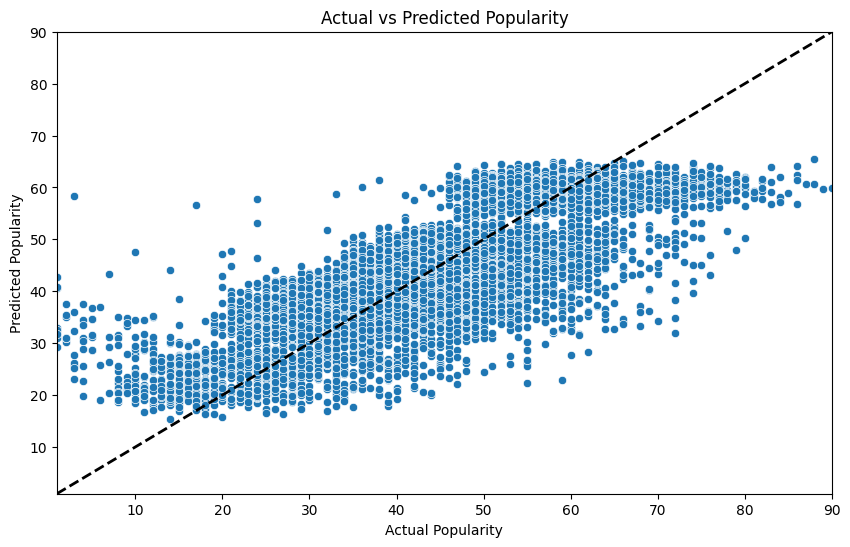

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten())
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')

R^2 Score: 0.6561
